In [1]:
# IMPORT SECTION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sn
import statistics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

In [2]:
# I read the file
# I rename all variables

df = pd.read_csv ('data.csv',sep=",")
df = df.drop(columns=['Response ID', 'Date submitted', 'Last page', 'Start language',
                     'Seed', 'Date started', 'Date last action', 
                     'You are being invited to partcipate in a research study titled "Transportation Preferences in Belgium"  This study is being conducted by Universite Libre de Bruxelles (ULB) explicity for scientific purposes.   The purpose of this study is to discover the preferences of Belgian Population in the transportation sector.   The EU data protection law called GDPR regulates how personal data is processed, under that law, I must have your explicit consent, before continuing with this survey.          ',
                     'Total time',
                      'Group time: Disclaimer ',
                      'Question time: G01Q93',
                      'Group time: Attributes',
                      'Question time: G02Q16',
                      'Question time: G02Q17',
                      'Question time: G02Q22',
                      'Group time: Pro-existing environmental friendly behaviour',
                      'Question time: G10Q98',
                      'Group time: Green Scale',
                      'Question time: G11Q99',
                      'Group time: Technical Awareness ',
                      'Question time: G12Q100',
                      'Question time: G05Q19',
                      'Question time: G12Q101',
                      'Question time: G12Q102',
                      'Question time: G12Q103',
                      'Question time: G12Q104',
                      'Group time: Subjective Norms',
                      'Question time: G13Q105',
                      'Group time: Demographical Questions',
                      'Question time: country',
                      'Question time: DQ0001',
                      'Question time: DQ0002',
                      'Question time: DQ0003',
                      'Question time: DQ0004',
                      'Question time: residence'
                     ])


df = df.rename(columns={'Are you using the bus ?' : 'bus_use',
                        'How often do you take the bus ?' : 'bus_times',
                        'Please answer the following questions  [How much do you care about the type of fuel of the bus that you use or could use ? (diesel, electric, hybrid electric ,hydrogen)]':'fuel_care',
                        'Please answer the following questions  [How much do you care about the ticket cost of the bus that you use or could use? ]': 'ticket_cost',
                        'Please answer the following questions  [How much do you care about the schedule frequency of the bus that you use or could use? ]':'schedule_freq',
                        'Please answer the following questions  [How much do you care about the source of funding of the bus that you are using ? (Regional, Federal, European)]':'funding_source',
                        'Rate your level of agreement for each of the following statements  [I buy seasonal products]':'seasonal_product',
                        'Rate your level of agreement for each of the following statements  [I buy locally produced foods]':'local_food',
                        'Rate your level of agreement for each of the following statements  [I eat a vegetarian meal]' :'vege_meal',
                        'Rate your level of agreement for each of the following statements  [I use the public transportation ]':'public_transport',
                        'Rate your level of agreement for each of the following statements  [I cycle instead of drive]':'cycle',
                        'Rate your level of agreement for each of the following statements  [I buy food closer to its expiration date to help supermarkets avoid waste]':'food_closer',
                        'Rate your level of agreement for each of the following statements  [I turn off the lights when leaving a place]':'light_off',
                        'Rate your level of agreement for each of the following statements  [I collect and recycle used paper]':'use_paper',
                        'Rate your level of agreement for each of the following statements  [I collect and recycle food waste]':'food_waste',
                        'Rate your level of agreement for each of the following statements  [I collect and recycle packages ]':'packages',
                        'Rate your level of agreement for each of the following statements  [I collect and recycle empty glass bottles]':'emptu_glass',
                        'Rate your level of agreement for each of the following statements  [I turn off the water while brushing my teeth]':'water_teeth',
                        'Rate your level of agreement for each of the following statements  [I turn off the water while shaving]':'water_shaving',
                        'Rate your level of agreement for each of the following statements  [I try to consume less in general]':'consume_less',
                        'Rate your level of agreement for each of the following statements  [I lower the thermostat during the night]':'lowerthermostat_night',
                        'Rate your level of agreement for each of the following statements  [I unplug unused electronics]':'unplug_elec',
                        'Rate your level of agreement for each of the following statements  [It is important to me that the products I use do not harm the environment ]':'product_no_harm',
                        'Rate your level of agreement for each of the following statements  [I consider the potential environmental impact of my actions when making many of my decisions]':'envi_impact_decision',
                        'Rate your level of agreement for each of the following statements  [My purchase habits are affected by my concern for our environment ]':'purchase_habits',
                        'Rate your level of agreement for each of the following statements  [I am concerned about wasting the resources of our planet]':'wasting_resources',
                        'Rate your level of agreement for each of the following statements  [I would describe myself as environmentally responsible]':'me_envi_responsive',
                        'Rate your level of agreement for each of the following statements  [I am willing to be inconvenienced in order to take actions that are more environmentally friendly ]':'wllling_inco',
                        'Do you know the difference between renewable and non-renewable energy?':'dif_renwe_no',
                        'Which of the following technologies are considered as renewable from your experience? [Solar energy]':'re_solar_e',
                        'Which of the following technologies are considered as renewable from your experience? [Fossil Fuels ]':'re_fossil_fuel',
                        'Which of the following technologies are considered as renewable from your experience? [Natural Gas]':'re_natural_gaz',
                        'Which of the following technologies are considered as renewable from your experience? [Wind Energy]':'re_wind_e',
                        'Which of the following technologies are considered as renewable from your experience? [Hydrogen]':'re_hydrogen_e',
                        'Which of the following technologies are considered as renewable from your experience? [Uranium]':'re_ur_e',
                        'Which of the following technologies are considered as renewable from your experience? [Hydropower]':'re_hydropower_e',
                        'Which of the following technologies are considered as renewable from your experience? [Geothermal Energy ]':'re_geo_e',
                        'Which of the following technologies are considered as renewable from your experience? [Coal]':'re_coal_e',
                        'Which of the following technologies are considered as renewable from your experience? [Crude Oil]':'re_crudeOil_e',
                        'Are you aware of the Paris Agreement ?':'know_Paris_agr',
                        'Are you aware of the European Green Deal ?':'Eu_greenDeal',
                        'Are you aware of the following available technologies in the transportation ? (You can choose multiple answers) [Gasoline Vehicles ]':'follow_gasoline_v',
                        'Are you aware of the following available technologies in the transportation ? (You can choose multiple answers) [Diesel Vehicles ]':'follow_diesel',
                        'Are you aware of the following available technologies in the transportation ? (You can choose multiple answers) [Liquefied Petroleum Vehicles]':'follow_liq_petr_v',
                        'Are you aware of the following available technologies in the transportation ? (You can choose multiple answers) [Ethanol Vehicles ]':'follow_etha_v',
                        'Are you aware of the following available technologies in the transportation ? (You can choose multiple answers) [Compressed Natural Gas Vehicles]':'follow_natgas_v',
                        'Are you aware of the following available technologies in the transportation ? (You can choose multiple answers) [Biodiesel Vehicles ]':'follow_biodisel_v',
                        'Are you aware of the following available technologies in the transportation ? (You can choose multiple answers) [Electric Batteries Vehicles ]':'follow_elec_v',
                        'Are you aware of the following available technologies in the transportation ? (You can choose multiple answers) [Hybrid Vehicles]':'follow_hybrid_v',
                        'Are you aware of the following available technologies in the transportation ? (You can choose multiple answers) [Hydrogen Vehicles]':'follow_hydro_v',
                        'To what extent do you agree with the following statements ? [I am following the news related to the latest environmental laws in Belgium]':'follow_laws_Bel',
                        'To what extent do you agree with the following statements ? [I am following the news related to the latest environmental laws in European Union]':'follow_laws_EU',
                        'To what extent do you agree with the following statements ? [I am following the news related to transportation sector ]':'follow_transporsector',
                        'To what extent do you agree with the following statements ? [I am usually updated of the existing and available technologies in the energy sector ]':'follow_newTech_eSector',
                        'To what extent do you agree with the following statements ? [I usually inform my friends and family for any updates related with energy transition and climate change]':'informed_friends',
                        'To what extent do you agree with the following statements ? [I can easily understand the technical aspects of a new technology]':'understand_techno',
                        'To what extent do you agree with the following statements ? [My friends think that climate change is real]':'friend_opinion',
                        'To what extent do you agree with the following statements ? [My family would definitely support me towards an environmental friendly behaviour]':'familly_support_envi',
                        'To what extent do you agree with the following statements ? [My social media followers and friends believe that we should protect our planet]':'friend_protect',
                        'To what extent do you agree with the following statements ? [My colleagues have environmental awareness  ]':'colleague_envi',
                        'To what extent do you agree with the following statements ? [In my community, people recycling very often]':'people_recycling',
                        'To what extent do you agree with the following statements ? [In my community, people use public transportation more often than cars]':'public_transport',
                        'To what extent do you agree with the following statements ? [Based on your experience, humans are responsible for climate change]':'humans_responsible',
                        'In which region of Belgium do you currently live ?':'region_live',
                        'What is your age?':'age',
                        'What gender do you identify with?':'gender',
                        'What is the highest degree or level of education you have completed?':'edu',
                        'What is your monthly household net income?':'net_income',
                        'What type of community do you live in?':'community_type',
})

print("Shape : ", df.shape)
df = df.dropna()
print("Shape without NaN : ", df.shape)
df = df.reset_index()
df = df.drop(columns=['index'])
len_df = len(df)
df.head(25)

Shape :  (380, 69)
Shape without NaN :  (358, 69)


,bus_use,bus_times,fuel_care,ticket_cost,schedule_freq,funding_source,seasonal_product,local_food,vege_meal,public_transport,...,colleague_envi,people_recycling,public_transport,humans_responsible,region_live,age,gender,edu,net_income,community_type
0,Yes,Monthly,I do care,I do care a lot,I do care,I do care,Often,Sometimes,Sometimes,Often,...,Neutral,Somewhat Agree,Neutral,Agree,Brussels Capital,25-34,Male,Master Degree,"2,000€ - 2,499€",Suburb near a large city
1,Yes,Monthly,I do care,Neutral,I do care,I don't care,Sometimes,Never,Sometimes,Often,...,Agree,Agree,Somewhat Disagree,Strongly Agree,Brussels Capital,25-34,Male,Master Degree,"More than 4,000€",Large City
2,Yes,Every Day,I do care,I do care a lot,I do care a lot,Neutral,Always,Often,Sometimes,Always,...,Strongly Agree,Strongly Agree,Agree,Agree,Brussels Capital,25-34,Male,Master Degree,"1,500€ - 1,999€",Large City
3,Yes,2-3 times a week,I do care a lot,I do care a lot,I do care,Neutral,Always,Often,Often,Often,...,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Brussels Capital,25-34,Male,Master Degree,"2,000€ - 2,499€",Large City
4,Yes,2-3 times a week,I do care,I do care,I do care a lot,I don't care at all,Often,Non Applicable,Often,Often,...,Strongly Agree,Agree,Strongly Agree,Somewhat Agree,Brussels Capital,25-34,Female,Master Degree,"2,000€ - 2,499€",Large City
5,No,Less than once a month,Neutral,I do care,I do care,I don't care,Sometimes,Sometimes,Sometimes,Never,...,Somewhat Agree,Somewhat Agree,Neutral,Strongly Agree,Brussels Capital,25-34,Female,Master Degree,"3,000€ - 3,999€",Large City
6,Yes,Monthly,I do care,I do care a lot,I do care,I don't care,Often,Sometimes,Sometimes,Always,...,Neutral,Strongly Agree,Agree,Strongly Agree,Brussels Capital,35-44,Male,Bachelor Degree,"1,500€ - 1,999€",Large City
7,No,Less than once a month,Neutral,I do care,I don't care at all,I don't care at all,Sometimes,Sometimes,Always,Sometimes,...,Strongly Agree,Agree,Somewhat Agree,Strongly Agree,Flanders,25-34,Male,Master Degree,"More than 4,000€",Small City or Town
8,No,Less than once a month,I don't care at all,I do care,I do care,I don't care at all,Sometimes,Sometimes,Sometimes,Sometimes,...,Somewhat Agree,Neutral,Agree,Agree,Brussels Capital,25-34,Male,Master Degree,"2,500€ - 2,999€",Large City
9,Yes,2-3 times a week,Neutral,I do care,I do care a lot,I don't care,Often,Sometimes,Sometimes,Often,...,Agree,Agree,Somewhat Agree,Agree,Brussels Capital,25-34,Male,Doctorate,"2,500€ - 2,999€",Large City


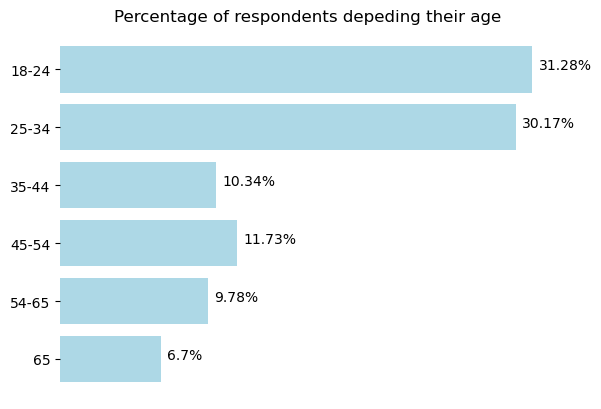

In [5]:
k1 = 0
k2 = 0
k3 = 0
k4 = 0
k5 = 0
k0 = 0

for i in range(len_df):
    if df['age'][i] == '25-34':
        k1 += 1
    elif df['age'][i] == '35-44':
        k2 += 1
    elif df['age'][i] == '45-54' :
        k3 += 1
    elif df['age'][i] == '54-65':
        k4 += 1
    elif df['age'][i] == '65+':
        k5 += 1
    elif df['age'][i] == '18-24':
        k0 += 1


av_k0 = (k0/len_df)*100
av_k1 = (k1/len_df)*100
av_k2 = (k2/len_df)*100
av_k3 = (k3/len_df)*100
av_k4 = (k4/len_df)*100
av_k5 = (k5/len_df)*100

plt.rcdefaults()
fig, ax = plt.subplots()

x_subjects = ['18-24','25-34', '35-44', '45-54', '54-65', '65']
y_pos = np.arange(len(x_subjects))
percentage = [av_k0, av_k1,av_k2,av_k3, av_k4, av_k5]

ax.barh(y_pos, percentage, align='center', color = 'lightblue',)
ax.set_yticks(y_pos)
ax.set_yticklabels(x_subjects)
ax.invert_yaxis()
ax.set_title('Percentage of respondents depeding their age')
fig.patch.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_xaxis().set_ticks([])
for i in range(len(percentage)):
    plt.text(percentage[i] + 0.4, i , str(round(percentage[i], 2))+'%')

plt.show()

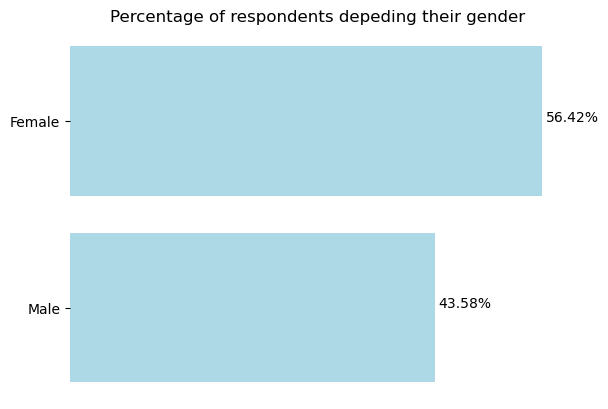

In [6]:
k_Fe = 0
k_Ho = 0

for i in range(len_df):
    if df['gender'][i] == 'Female':
        k_Fe += 1
    else :
        k_Ho += 1

av_kFe = (k_Fe/len_df)*100
av_kHo = (k_Ho/len_df)*100


plt.rcdefaults()
fig, ax = plt.subplots()

x_subjects = ['Female', 'Male']
y_pos = np.arange(len(x_subjects))
percentage = [av_kFe,av_kHo]

ax.barh(y_pos, percentage, align='center', color = 'lightblue',)
ax.set_yticks(y_pos)
ax.set_yticklabels(x_subjects)
ax.invert_yaxis()
ax.set_title('Percentage of respondents depeding their gender')
fig.patch.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_xaxis().set_ticks([])
for i in range(len(percentage)):
    plt.text(percentage[i] + 0.4, i , str(round(percentage[i], 2))+'%')

plt.show()

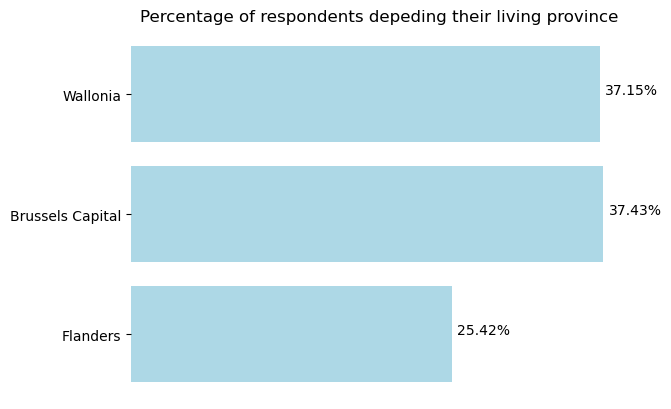

In [7]:
k_Wa = 0
k_Bx = 0
k_Fl = 0


for i in range(len_df):
    if df['region_live'][i] == 'Wallonia':
        k_Wa += 1
    elif df['region_live'][i] == 'Brussels Capital':
        k_Bx += 1
    elif df['region_live'][i] == 'Flanders' :
        k_Fl += 1

av_kWa = (k_Wa/len_df)*100
av_kBx = (k_Bx/len_df)*100
av_kFl = (k_Fl/len_df)*100

plt.rcdefaults()
fig, ax = plt.subplots()

x_subjects = ['Wallonia', 'Brussels Capital', 'Flanders']
y_pos = np.arange(len(x_subjects))
percentage = [av_kWa,av_kBx,av_kFl]

ax.barh(y_pos, percentage, align='center', color = 'lightblue',)
ax.set_yticks(y_pos)
ax.set_yticklabels(x_subjects)
ax.invert_yaxis()
ax.set_title('Percentage of respondents depeding their living province')
fig.patch.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_xaxis().set_ticks([])
for i in range(len(percentage)):
    plt.text(percentage[i] + 0.4, i , str(round(percentage[i], 2))+'%')

plt.show()

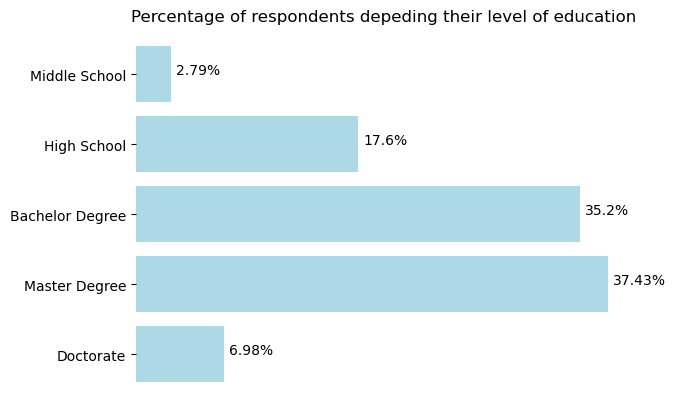

In [9]:
k1 = 0
k2 = 0
k3 = 0
k4 = 0
k5 = 0

for i in range(len_df):
    if df['edu'][i] == 'Middle School':
        k1 += 1
    elif df['edu'][i] == 'High School':
        k2 += 1
    elif df['edu'][i] == 'Bachelor Degree' :
        k3 += 1
    elif df['edu'][i] == 'Master Degree':
        k4 += 1
    elif df['edu'][i] == 'Doctorate':
        k5 += 1

av_k1 = (k1/len_df)*100
av_k2 = (k2/len_df)*100
av_k3 = (k3/len_df)*100
av_k4 = (k4/len_df)*100
av_k5 = (k5/len_df)*100

plt.rcdefaults()
fig, ax = plt.subplots()

x_subjects = ['Middle School', 'High School', 'Bachelor Degree', 'Master Degree', 'Doctorate']
y_pos = np.arange(len(x_subjects))
percentage = [av_k1,av_k2,av_k3, av_k4, av_k5]

ax.barh(y_pos, percentage, align='center', color = 'lightblue',)
ax.set_yticks(y_pos)
ax.set_yticklabels(x_subjects)
ax.invert_yaxis() 
ax.set_title('Percentage of respondents depeding their level of education')
fig.patch.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_xaxis().set_ticks([])
for i in range(len(percentage)):
    plt.text(percentage[i] + 0.4, i , str(round(percentage[i], 2))+'%')

plt.show()


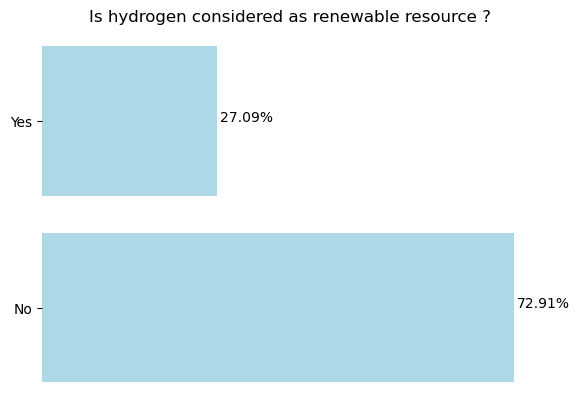

In [10]:
Yes = 0
No = 0

for i in range(len_df):
    if df['re_hydrogen_e'][i] == 'Yes':
        Yes += 1
    elif df['re_hydrogen_e'][i] == 'No':
        No += 1


av_Yes = (Yes/len_df)*100
av_No = (No/len_df)*100


plt.rcdefaults()
fig, ax = plt.subplots()

x_subjects = ['Yes', 'No']
y_pos = np.arange(len(x_subjects))
percentage = [av_Yes,av_No]

ax.barh(y_pos, percentage, align='center', color = 'lightblue',)
ax.set_yticks(y_pos)
ax.set_yticklabels(x_subjects)
ax.invert_yaxis()
ax.set_title('Is hydrogen considered as renewable resource ?')
fig.patch.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_xaxis().set_ticks([])
for i in range(len(percentage)):
    plt.text(percentage[i] + 0.4, i , str(round(percentage[i], 2))+'%')

plt.show()

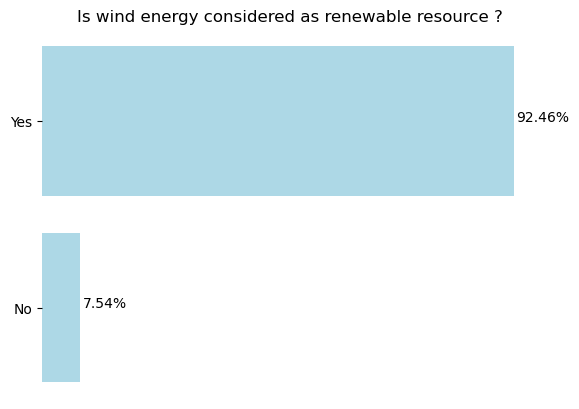

In [11]:
Yes = 0
No = 0

for i in range(len_df):
    if df['re_wind_e'][i] == 'Yes':
        Yes += 1
    elif df['re_wind_e'][i] == 'No':
        No += 1


av_Yes = (Yes/len_df)*100
av_No = (No/len_df)*100


plt.rcdefaults()
fig, ax = plt.subplots()

x_subjects = ['Yes', 'No']
y_pos = np.arange(len(x_subjects))
percentage = [av_Yes,av_No]

ax.barh(y_pos, percentage, align='center', color = 'lightblue',)
ax.set_yticks(y_pos)
ax.set_yticklabels(x_subjects)
ax.invert_yaxis()
ax.set_title('Is wind energy considered as renewable resource ?')
fig.patch.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_xaxis().set_ticks([])
for i in range(len(percentage)):
    plt.text(percentage[i] + 0.4, i , str(round(percentage[i], 2))+'%')

plt.show()

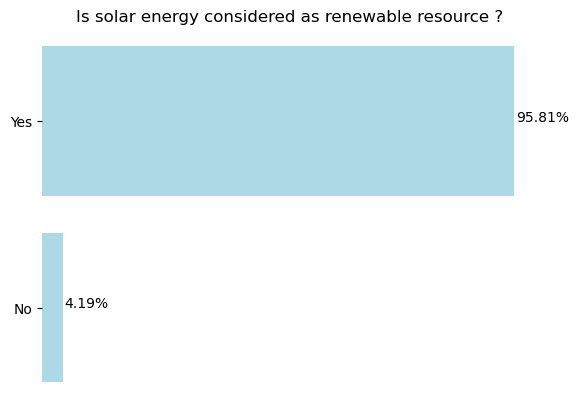

In [12]:
#re_solar_e
Yes = 0
No = 0

for i in range(len_df):
    if df['re_solar_e'][i] == 'Yes':
        Yes += 1
    elif df['re_solar_e'][i] == 'No':
        No += 1


av_Yes = (Yes/len_df)*100
av_No = (No/len_df)*100


plt.rcdefaults()
fig, ax = plt.subplots()

x_subjects = ['Yes', 'No']
y_pos = np.arange(len(x_subjects))
percentage = [av_Yes,av_No]

ax.barh(y_pos, percentage, align='center', color = 'lightblue',)
ax.set_yticks(y_pos)
ax.set_yticklabels(x_subjects)
ax.invert_yaxis() 
ax.set_title('Is solar energy considered as renewable resource ?')
fig.patch.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_xaxis().set_ticks([])
for i in range(len(percentage)):
    plt.text(percentage[i] + 0.4, i , str(round(percentage[i], 2))+'%')

plt.show()